### Шмидт Ян, 304 гр., 2023, Вариант 9

Из условия: $$\xi = \dfrac{1}{11}, \quad A = \dfrac{1}{15}, \quad B = \dfrac{1}{25}$$
Система ОДУ:
$$\dfrac{dy_1(x)}{dx}=Ay_2(x)\\ \dfrac{dy_2(x)}{dx}=-By_1(x)$$
Начальные данные: $$x_0 = 0\\ y_1(x_0)=B\pi\\ y_2(x_0)=A\pi$$

$$x_k = \pi\\ y_1(x_k) = ?\\ y_2(x_k) = ?$$

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

### Посчитаем необходимые коэффициенты

In [2]:
A = 1/15
B = 1/25
pi = np.pi
xi = 1/11

c2 = xi
a21 = c2
b1 = 1 - 1/(2*c2)
b2 = 1/(2*c2)
print(f'\nДля двухэтапного метода Рунге-Кутты: \nc2 = {c2}, \na21 = {a21}, \nb1 = {b1}, \nb2 = {b2}')


Для двухэтапного метода Рунге-Кутты: 
c2 = 0.09090909090909091, 
a21 = 0.09090909090909091, 
b1 = -4.5, 
b2 = 5.5


### Правая часть системы дифференциальных уравнений

In [3]:
def func(x: float, y: list):
    """Правая часть СОДУ"""
    
    A = 1/15
    B = 1/25
    
    y1 = A*y[1]
    y2 = -B*y[0]
    
    ans = [y1, y2]
    
    return np.array(ans)

### Начальные значения

In [4]:
x0 = 0
x1 = pi

y0 = [B*pi, A*pi]

### Точное решение поставленной задачи Коши

In [5]:
nodes = np.linspace(x0, x1, 150)

In [6]:
def y1(x):
    srt = np.sqrt(A*B)
    return ((A**(3/2))*pi*np.sin(srt*x)) / np.sqrt(B) + B*pi*np.cos(srt*x)

def y2(x):
    srt = np.sqrt(A*B)
    return (-1)*(np.sqrt(B/A))*(-(A**(3/2))*pi*np.cos(srt*x) / np.sqrt(B) + B*pi*np.sin(srt*x))

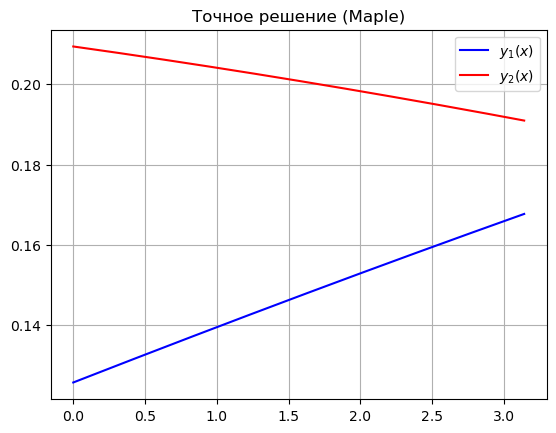

In [7]:
plt.plot(nodes, y1(nodes), color='b', label='$y_1(x)$')
plt.plot(nodes, y2(nodes), color='r', label='$y_2(x)$')

plt.grid()
plt.title('Точное решение (Maple)')
plt.legend()
plt.show()

In [8]:
y1_true = y1(pi)
y2_true = y2(pi)

f_true = [y1_true, y2_true]

print(f'Точное решение задачи Коши: {f_true}')

Точное решение задачи Коши: [0.16768641025029876, 0.19096724683765257]


In [9]:
def rungekutta2(f, y0, N, x0=0, x1=pi):
    """ЯМРК 2 порядка
    
    f: правая часть СОДУ
    y0: вектор начальных данных
    N: кол-во точек разбиения интервала (x0, x1)
    """
    
    t = np.linspace(x0, x1, N)
    h = (x1-x0) / N
    y = np.zeros((N+1, 2))
    y[0] = y0
    
    for i in range(N):
        k1 = h*f(t[i], y[i])
        k2 = h*f(t[i] + c2*h, y[i] + a21*k1)
        y[i+1] = y[i] + b1*k1 + b2*k2
        
    return y

### Оппонент: ЯМРК 4 порядка (Классический метод РК, правило $\frac{1}{6}$)

In [10]:
def opponent(f, y0, N, x0=0, x1=pi):
    """ЯМРК 4 порядка (правило одной шестой, или классический метод
    Рунге-Кутты)"""
    
    t = np.linspace(x0, x1, N)
    h = (x1-x0) / N
    y = np.zeros((N+1, 2))
    y[0] = y0
    
    for i in range(N):
        k1 = f(t[i], y[i])
        k2 = f(t[i] + h/2., y[i] + k1*h/2.)
        k3 = f(t[i] + h/2., y[i] + k2*h/2.)
        k4 = f(t[i] + h, y[i] + k3*h)
        y[i+1] = y[i] + (h/6.)*(k1 + 2*k2 + 2*k3 + k4)
        
    return y

### График зависимости нормы точной погрешности в конце отрезка от шага $h = \frac{1}{2^k}, k=\overline{0, 6}$

In [11]:
Norm_1 = []
Norm_2 = []
H = []

for k in range(14):
    h1 = 1/pow(2, k)
    H.append(h1)
    N1 = int((x1-x0)/h1)
    
    """Решение первым методом"""
    temp1 = rungekutta2(func, y0, N1)
    res1 = temp1[N1]
    Norm_1.append(np.linalg.norm(np.array(res1) - np.array(f_true)))

    """Решение вторым методом"""
    temp2 = opponent(func, y0, N1)
    res2 = temp2[N1]
    Norm_2.append(np.linalg.norm(np.array(res2) - np.array(f_true)))
    
H = H[2::]
Norm_1 = Norm_1[2::]
Norm_2 = Norm_2[2::]

print(f'Шаги H:\n {H}')
print(f'\nНорма точной погрешности в конце отрезка для первого метода при различных h:\n {Norm_1}')
print(f'\nНорма точной погрешности в конце отрезка для оппонента при различных h:\n {Norm_2}')

Шаги H:
 [0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625, 0.001953125, 0.0009765625, 0.00048828125, 0.000244140625, 0.0001220703125]

Норма точной погрешности в конце отрезка для первого метода при различных h:
 [1.3800527663956985e-06, 3.176115713008442e-07, 7.936199230828343e-08, 1.9835372779248273e-08, 4.908986119800477e-09, 1.2271676009274976e-09, 3.0678201467630994e-10, 7.669486403075359e-11, 1.9174046644394586e-11, 4.790711932355375e-12, 1.2000884370259093e-12, 3.0069308073551735e-13]

Норма точной погрешности в конце отрезка для оппонента при различных h:
 [1.2614646244591734e-11, 6.687982400301401e-13, 4.172608407221228e-14, 2.6694457840969112e-15, 1.3877787807814457e-16, 2.2887833992611187e-16, 2.220446049250313e-16, 6.162737906427329e-16, 4.847302891456678e-16, 5.214799211354908e-16, 8.391185778350837e-16, 1.4752290795525882e-15]


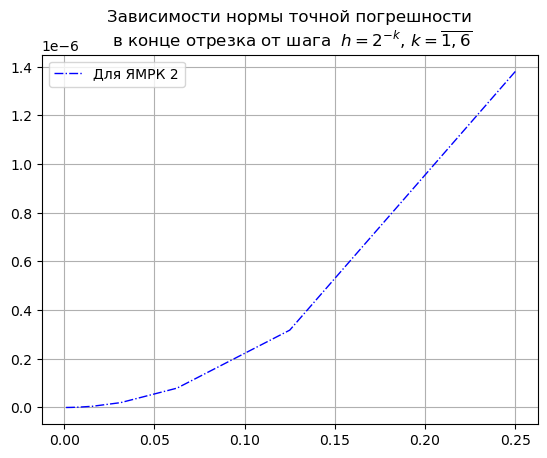

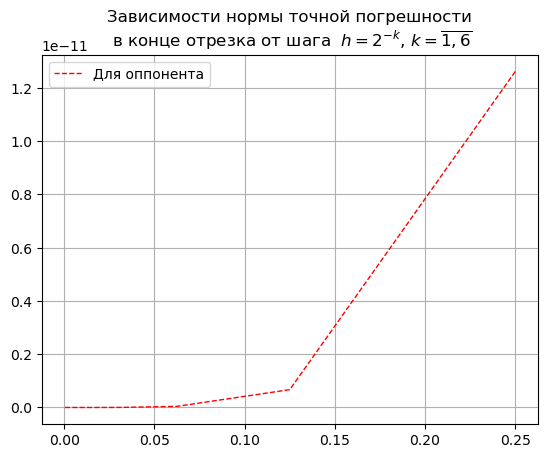

In [12]:
plt.plot(H, Norm_1, 
        color='blue', 
        linestyle='dashdot', 
        label='Для ЯМРК 2',
        linewidth=1)

plt.legend()
plt.title('Зависимости нормы точной погрешности\n в конце отрезка от шага  $h=2^{-k}$, $k=\overline{1,6}$')
plt.grid()
plt.show()

plt.plot(H, Norm_2, 
        color='red', 
        linestyle='dashed', 
        label='Для оппонента',
        linewidth=1)

plt.legend()
plt.title('Зависимости нормы точной погрешности\n в конце отрезка от шага  $h=2^{-k}$, $k=\overline{1,6}$')
plt.grid()
plt.show()

### Подборка оптимального постоянного шага для ЯМРК 2

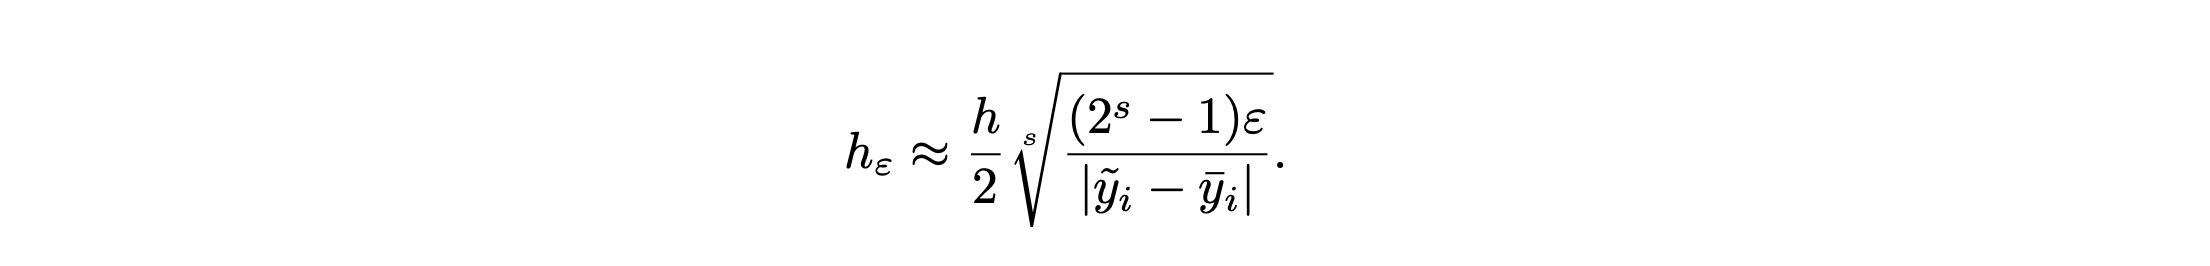

In [13]:
N1 = 1000
N2 = 2*N1
h = (x1-x0) / N1
s = 2

tol = 10**(-5)

res1_1 = rungekutta2(func, y0, N1)
res1_1 = res1_1[N1]

res1_2 = rungekutta2(func, y0, N2)
res1_2 = res1_2[N2]

"""Норма разности двух приближений: по сетке с шагом
h и h/2 соответственно"""
diff1 = np.linalg.norm(np.array(res1_1) - np.array(res1_2) )

h_opt1 = 0.5*h*((2**s - 1)*tol / diff1)**(1/s)
N_opt1 = int((x1-x0) / h_opt1)

# Итоговый результат
res1 = rungekutta2(func, y0, N_opt1)
fmean = res1[N_opt1]

In [14]:
print(f'Приближенное решение: {fmean}')
print(f'Точное решение: {f_true}')
print(f'Норма погрешности: {np.linalg.norm(np.array(f_true) - np.array(fmean))}')
print(f'Длина шага: {h_opt1}')
print(f'Количество шагов: {N_opt1}')

Приближенное решение: [0.1676976  0.19096173]
Точное решение: [0.16768641025029876, 0.19096724683765257]
Норма погрешности: 1.2472497090745255e-05
Длина шага: 0.7054703115211487
Количество шагов: 4


### Подборка оптимального постоянного шага для оппонента

In [15]:
s = 4

res2_1 = opponent(func, y0, N1)
res2_1 = res2_1[N1]

res2_2 = opponent(func, y0, N2)
res2_2 = res2_2[N2]

"""Норма разности двух приближений: по сетке с шагом
h и h/2 соответственно"""
diff2 = np.linalg.norm(np.array(res2_1) - np.array(res2_2))

h_opt2 = 0.5*h*((2**s - 1)*tol / diff2)**(1/s)
N_opt2 = int((x1-x0) / h_opt2)

# Итоговый результат
res2 = opponent(func, y0, N_opt2)
fmean = res2[N_opt2]

In [16]:
print(f'Приближенное решение: {fmean}')
print(f'Точное решение: {f_true}')
print('Норма погрешности:', np.linalg.norm(np.array(f_true) - np.array(fmean)))
print('Длина шага:', h_opt2)
print('Количество шагов:', N_opt2)

Приближенное решение: [0.1676864  0.19096725]
Точное решение: [0.16768641025029876, 0.19096724683765257]
Норма погрешности: 1.6534874105115986e-08
Длина шага: 1.1187944633667863
Количество шагов: 2


### График зависимости полной погрешности от независимой переменной x

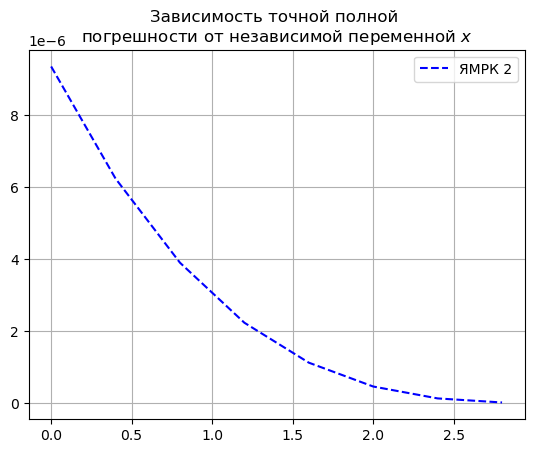

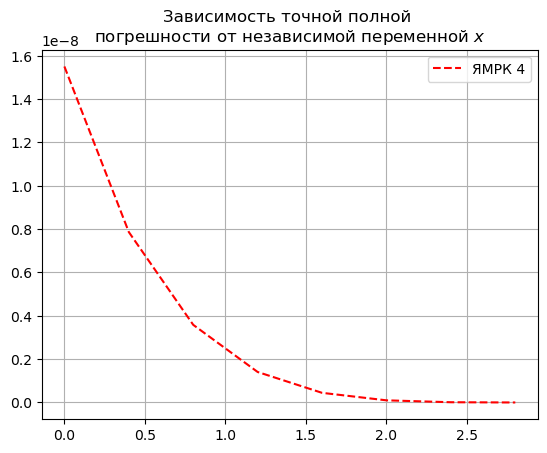

In [17]:
RR1 = []
RR2 = []

X = np.arange(x0, x1, 0.4)

for i in range(len(X)):
    h = (x1-x0) / H[i]

    # Результат на первой сетке для ЯМРК 2     
    res1_1 = rungekutta2(func, y0, N_opt1, x0=X[i])
    res1_1 = res1_1[-1]
    # Результат на второй сетке для ЯМРК 2
    res1_2 = rungekutta2(func, y0, 2*N_opt1, x0=X[i])
    res1_2 = res1_2[-1]
    
    # Норма разности найденных выше приблеженных решений
    R_temp = np.array(res1_1) - np.array(res1_2)
    RR1.append(np.linalg.norm(R_temp))

    # Результат на первой сетке для ЯМРК 4
    res2_1 = opponent(func, y0, N_opt2, x0=X[i])
    res2_1 = res2_1[-1]
    # Результат на второй сетке для ЯМРК 4
    res2_2 = opponent(func, y0, 2*N_opt2, x0=X[i])
    res2_2 = res2_2[-1]
    
    # Норма разности найденных выше приблеженных решений
    R_temp = np.array(res2_1) - np.array(res2_2)
    RR2.append(np.linalg.norm(R_temp))

plt.plot(X, RR1, 
        color='b', 
        linestyle='--',
        label='ЯМРК 2')

plt.title('Зависимость точной полной \nпогрешности от независимой переменной $x$')
plt.legend()
plt.grid()
plt.show()

plt.plot(X, RR2, 
        color='r', 
        linestyle='--',
        label='ЯМРК 4') # метод-оппонент

plt.title('Зависимость точной полной \nпогрешности от независимой переменной $x$')
plt.legend()
plt.grid()
plt.show()

### График зависимости полной погрешности от количества шагов

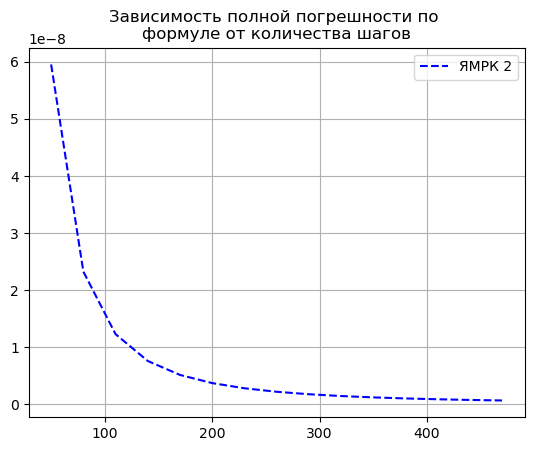

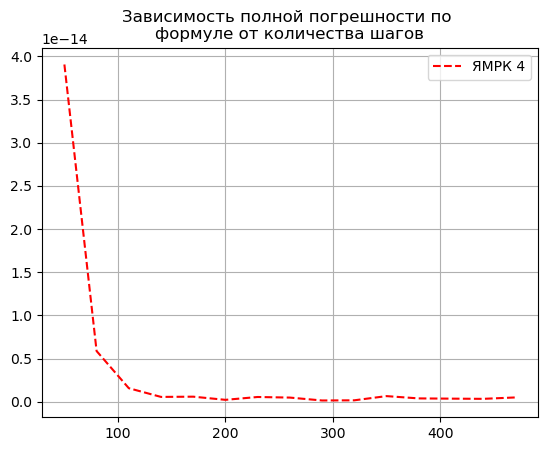

In [18]:
H = np.arange(50, 500, 30) # массив шагов
RR1 = []
RR2 = []

for i in range(len(H)):
    N1 = H[i]
    N2 = 2*N1
    h = (x1-x0) / H[i]
    
    res1_1 = rungekutta2(func, y0, N1)
    res1_1 = res1_1[-1]
    res1_2 = rungekutta2(func, y0, N2)
    res1_2 = res1_2[-1]
    
    R_temp = np.array(res1_1) - np.array(res1_2)
    RR1.append(np.linalg.norm(R_temp))

    res2_1 = opponent(func, y0, N1)
    res2_1 = res2_1[-1]
    res2_2 = opponent(func, y0, N2)
    res2_2 = res2_2[-1]
    
    R_temp = np.array(res2_1) - np.array(res2_2)
    RR2.append(np.linalg.norm(R_temp))

plt.plot(H, RR1, 
        color='b', 
        linestyle='--',
        label='ЯМРК 2')

plt.legend()
plt.title('Зависимость полной погрешности по \nформуле от количества шагов')
plt.grid()
plt.show()

plt.plot(H, RR2, 
        color='r', 
        linestyle='--',
        label='ЯМРК 4') # метод-оппонент

plt.legend()
plt.title('Зависимость полной погрешности по \nформуле от количества шагов')
plt.grid()
plt.show()

In [19]:
rtol = 10**(-6)

### Поиск начального шага

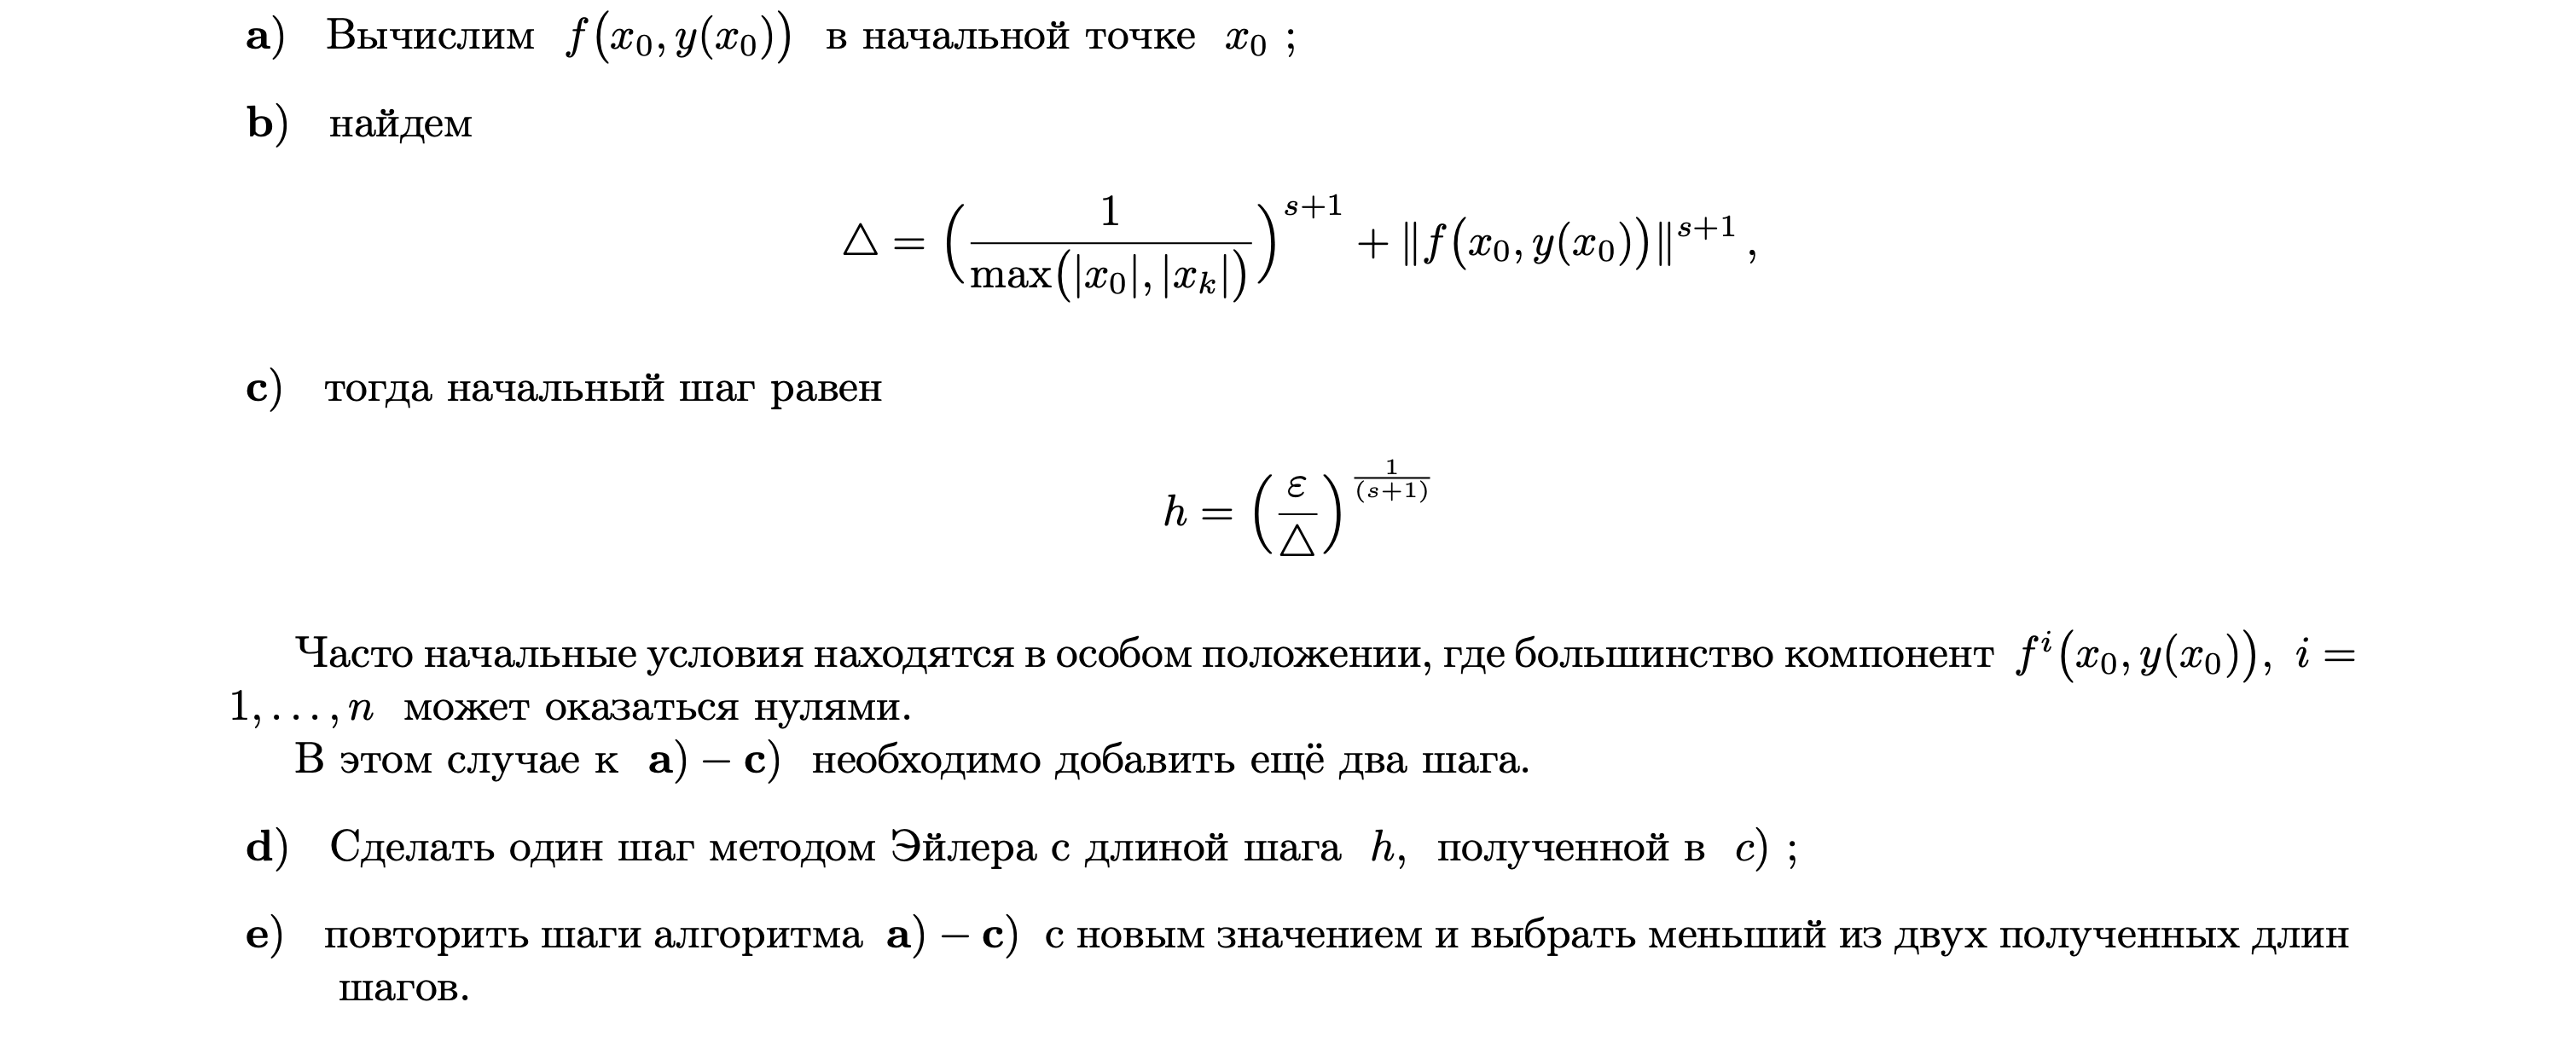

In [136]:
def first_step1(x0, x1, y0):
    """Выбор начального шага для ЯМРК 2"""
    
    s = 2
    # Пункт a)
    ff = func(x0, y0)
    count = 0
    
    for i in ff:
        if i == 0:
            count += 1
    
    # Пункт b)
    delta = (1/(max(abs(x0), abs(x1))))**(s+1) + abs(np.linalg.norm(ff))**(s+1)
    h1 = (rtol/delta)**(1/(s+1))
    
    """см. пункты d) - e)"""
    if count > 2:
        x0 = x0 + h1
        y0 = np.array(y0) + h1*np.array(ff)
        ff = func(x0, y0)
        delta = (1/(max(abs(x0), abs(x1))))**(s+1) + abs(np.linalg.norm(ff))**(s+1)
        h11 = (rtol/delta)**(1/(s+1))
        
        return min(h1, h11)

    else:
        return h1

In [137]:
def first_step2(x0, x1, y0):
    """Выбор начального шага для ЯМРК 4"""
    
    s = 4
    # Пункт a)
    ff = func(x0, y0)
    count = 0
    
    for i in ff:
        if i == 0:
            count += 1
    
    # Пункт b)
    delta = (1/(max(abs(x0), abs(x1))))**(s+1) + abs(np.linalg.norm(ff))**(s+1)
    h1 = (rtol/delta)**(1/(s+1))
    
    """см. пункты d) - e)"""
    if count > 2:
        x0 = x0 + h1
        y0 = np.array(y0) + h1*np.array(ff)
        ff = func(x0, y0)
        delta = (1/(max(abs(x0), abs(x1))))**(s+1) + abs(np.linalg.norm(ff))**(s+1)
        h11 = (rtol/delta)**(1/(s+1))
        
        return min(h1, h11)

    else:
        return h1

### Локальная погрешность Рунге

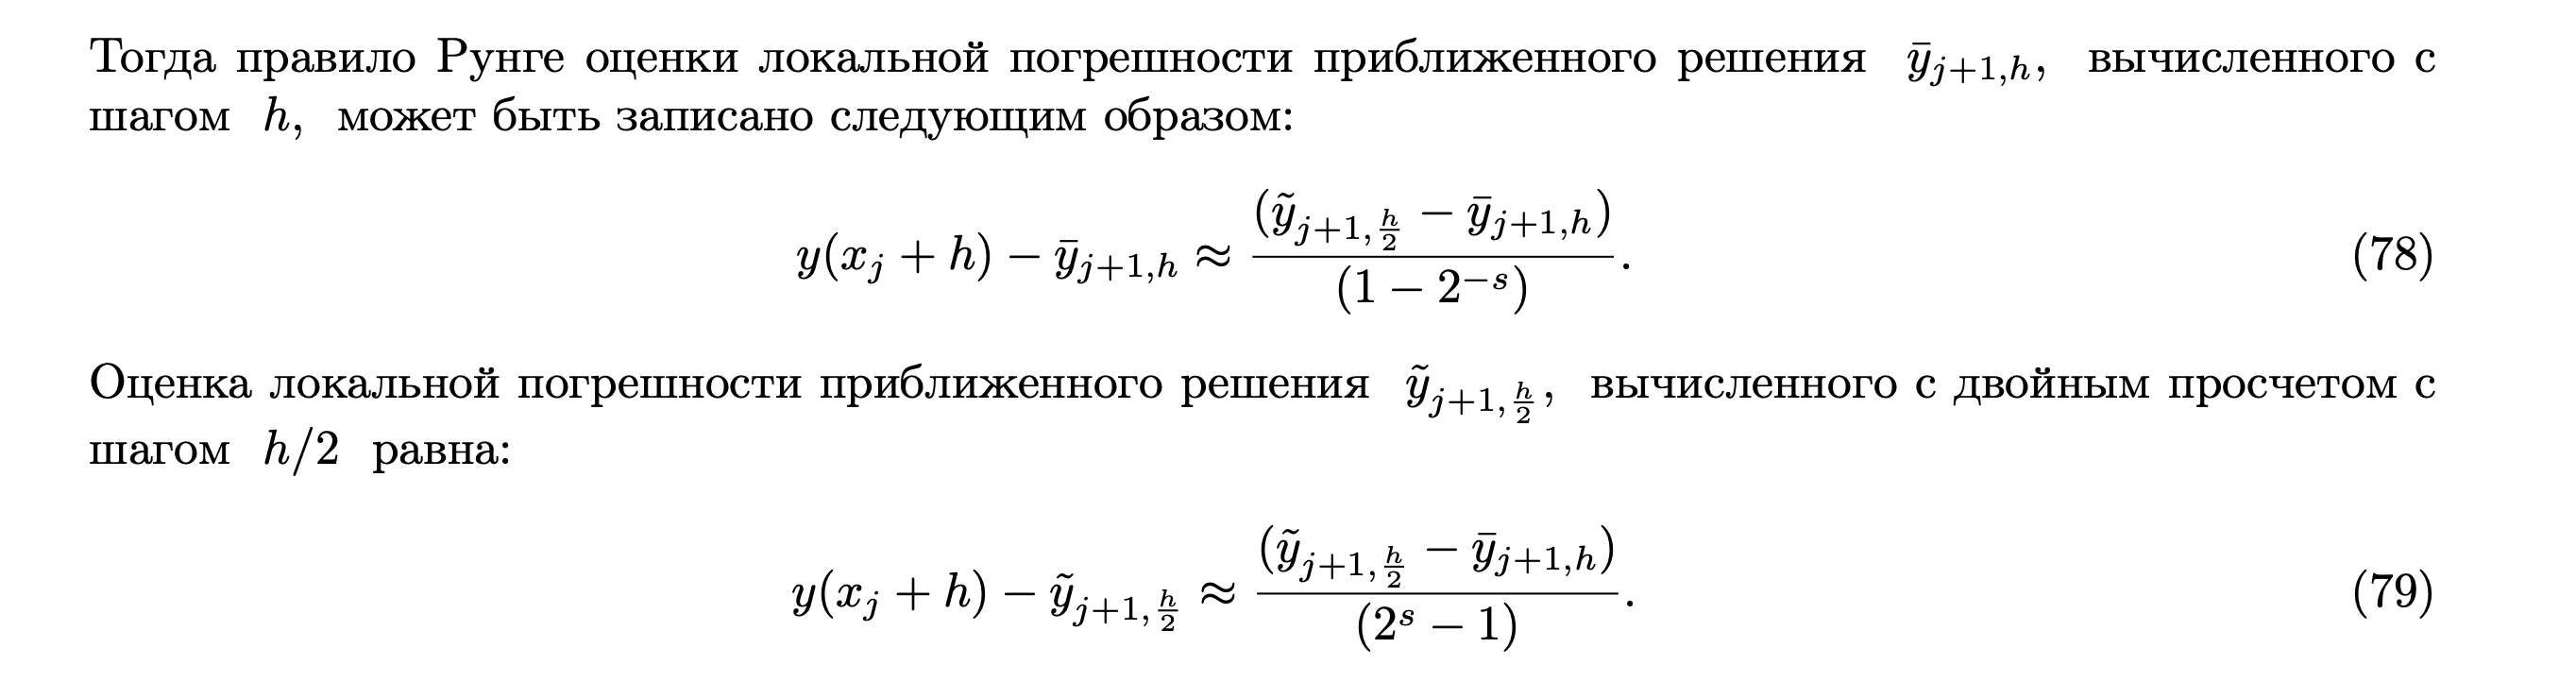

In [138]:
def local_errorrate(xk, yk, h):
    """Вычисление локальной погрешности для ЯМРК 2"""
    
    y_1step = rungekutta2(f=func, y0=yk, N=1, x0=xk, x1=xk+h)
    y_1step = y_1step[1]
    
    y_2step = rungekutta2(f=func, y0=yk, N=2, x0=xk, x1=xk+h)
    y_2step = y_2step[2]

    s = 2
    errorrate = (np.array(y_2step) - np.array(y_1step)) / (2**s - 1)
    
    return np.linalg.norm(errorrate)

In [139]:
def local_errorrate2(xk, yk, h):
    """Вычисление локальной погрешности для ЯМРК 4 (оппонент)"""
    
    y_1step = opponent(f=func, y0=yk, N=1, x0=xk, x1=xk+h)
    y_1step = y_1step[1]
    
    y_2step = opponent(f=func, y0=yk, N=2, x0=xk, x1=xk+h)
    y_2step = y_2step[2]
    
    s = 4
    errorrate = (np.array(y_2step) - np.array(y_1step)) / (2**s - 1)
    
    return np.linalg.norm(errorrate)

### Полная погрешность

In [140]:
def full_errorrate_rungekutta2(x0, x1, y0, h):
    """Вычисление полной погрешности для ЯМРК 2
    
    x0: начальное положение
    x1: конечное положение
    y0: начальные данные
    h: шаг
    """
    
    N1 = int((x1-x0) / h)
    N2 = 2*N1
    
    res1_1 = rungekutta2(func, y0, N1, x0, x1)
    res1_1 = res1_1[N1]
    
    res1_2 = rungekutta2(func, y0, N2, x0, x1)
    res1_2 = res1_2[N2]
    
    R = np.array(res1_1) - np.array(res1_2)
    
    return np.linalg.norm(R)

In [141]:
def full_errorrate_opponent(x0, x1, y0, h):
    """Вычисление полной погрешности для метода-оппонента
    
    x0: начальное положение
    x1: конечное положение
    y0: начальные данные
    h: шаг
    """
    
    N1 = int((x1-x0) / h)
    N2 = 2*N1
    
    res1_1 = opponent(func, y0, N1, x0, x1)
    res1_1 = res1_1[N1]
    
    res1_2 = opponent(func, y0, N2, x0, x1)
    res1_2 = res1_2[N2]
    
    R = np.array(res1_1) - np.array(res1_2)
    
    return np.linalg.norm(R)

### Автоматический выбор шага интегрирования для ЯМРК 2

In [142]:
def auto_step_rungekutta2(x0, x1, y0, h0, h_max, rtol):
    """
    Функция, реализующая автоматический выбор шага
    
    x0: начальное положение
    x1: конечное положение
    y0: начальные данные
    h0: начальный шаг
    h_max максимально допустимый шаг
    rtol: требуемая точность epsilon
    """

    H = [] # массив шагов
    H.append(h0)

    # массивы значений X, Y, R для графиков
    X = []
    Y1, Y2 = [], []
    R = []

    x_temp = x0
    y_temp = y0
    h_temp = h0
    
    r = local_errorrate(x_temp, y_temp, h_temp)

    X.append(x_temp)
    Y1.append(y_temp[0])
    Y2.append(y_temp[1])
    
    R.append(r)

    # полная погрешность
    R_ful = []
    R_ful.append(full_errorrate_rungekutta2(x_temp, min(x1, x_temp + h_temp), y_temp, h_temp))

    # счетчик обращений к правой части
    count = 2

    while x_temp <= x1:
        """Здесь реализуется один из четырех возможных 
        вариантов принятия решения"""
        if r > rtol*4:
            """Если оценка локальной погрешности превосходит некоторую наперед заданную границу,
            то считается, что приближенное решение с шагом h_i не удовлетворяет заданной точности.
            Уменьшаем шаг вдвое и пересчитываем заново"""
            
            # x_temp не меняется, остаемся на том же шаге
            h_temp = h_temp / 2
            H[-1] = h_temp
            # высчитываем новый r
            
            y_1step = rungekutta2(f=func, y0=y_temp, N=1, x0=x_temp, x1=x_temp + h_temp/2)
            y_1step = y_1step[1]
            
            y_2step = rungekutta2(f=func, y0=y_temp, N=2, x0=x_temp, x1=x_temp + h_temp)
            y_2step = y_2step[2]
            
            r = np.linalg.norm(np.array(y_2step) - np.array(y_1step))
            R[-1] = r # меняем значение r            
            R_ful[-1] = full_errorrate_rungekutta2(x_temp, min(x1, x_temp + h_temp), y_temp, h_temp)
            count += 8

        elif rtol < r <= tol*4:
            """Оценка локальной погрешности приближенного решения с шагом h_i удовлетворяет
            предписанной точности. Увеличивание шага интегрирования в два раза 
            выведет погрешность за рамки допустимого. Шаг остается неизменным"""
            
            y_temp = rungekutta2(f=func, y0=y_temp, N=2, x0=x_temp, x1=x_temp + h_temp)
            y_temp = y_temp[1]
            
            x_temp += h_temp
            h_temp = h_temp / 2
            H.append(h_temp)
            
            r = local_errorrate(x_temp, y_temp, h_temp)
            
            X.append(x_temp)            
            Y1.append(y_temp[0])
            Y2.append(y_temp[1])            
            R.append(r)
            R_ful.append(full_errorrate_rungekutta2(x_temp, min(x1, x_temp + h_temp), y_temp, h_temp))
            count += 6

        elif 1/8*rtol <= r <= tol:
            """Оценка локальной погрешности приближенного решения с шагом h_i не удовлетворяет
            предписанной точности, но можно взять приближение с шагом 0.5 * h_i"""
                    
            y_temp = rungekutta2(f=func, y0=y_temp, N=1, x0=x_temp, x1=x_temp + h_temp)
            y_temp = y_temp[1]
            
            x_temp = x_temp + h_temp
            # h_temp без изменений
            H.append(h_temp)
            
            r = local_errorrate(x_temp, y_temp, h_temp)
            X.append(x_temp)
            Y1.append(y_temp[0])
            Y2.append(y_temp[1])
            R.append(r)
            R_ful.append(full_errorrate_rungekutta2(x_temp, min(x1, x_temp + h_temp), y_temp, h_temp))
            count += 6

        elif r < 1/8*tol:
            """Оценка лок. пог. значительно меньше заданной. Рекомендуется увеличить
            шаг интегирования вдвое (это нужно для того, чтобы не совершать триллион шагов,
            когда задачу можно решить за существенно меньшее число итераций)"""
            
            y_temp = rungekutta2(f=func, y0=y_temp, N=1, x0=x_temp, x1=x_temp + h_temp)
            y_temp = y_temp[1]
            
            x_temp = x_temp + h_temp
            h_temp = min(2*h_temp, h_max)
            H.append(h_temp)
            
            r = local_errorrate(x_temp, y_temp, h_temp)
            X.append(x_temp)
            Y1.append(y_temp[0])
            Y2.append(y_temp[1])            
            R.append(r)
            R_ful.append(full_errorrate_rungekutta2(x_temp, min(x1, x_temp + h_temp), y_temp, h_temp))
            count += 6
            
    return {'Y1': Y1, 
            'Y2': Y2, 
            'R': R, 
            'H': H, 
            'X': X, 
            'y_temp': y_temp, 
            'R_ful': R_ful, 
            'count': count}

### Автоматический выбор шага интегрирования для метода-оппонента (ЯМРК 4)

In [143]:
def auto_step_opponent(x0, x1, y0, h0, h_max, rtol):
    H = [] # массив шагов
    H.append(h0)

    # массивы значений X, Y, R для графиков
    X = []
    Y1, Y2 = [], []
    R = []

    x_temp = x0
    y_temp = y0
    h_temp = h0
    r = local_errorrate(x_temp, y_temp, h_temp)

    X.append(x_temp)
    Y1.append(y_temp[0])
    Y2.append(y_temp[1])

    R.append(r)

    # точная полная погрешность
    R_ful = []
    R_ful.append(full_errorrate_opponent(x_temp, min(x1, x_temp + h_temp), y_temp, h_temp))

    # счетчик обращений к правой части
    count = 2

    while x_temp <= x1:
        if r > rtol*4:
            """Если оценка локальной погрешности превосходит некоторую наперед заданную границу,
            то считается, что приближенное решение с шагом h_i не удовлетворяет заданной точности.
            Уменьшаем шаг вдвое и пересчитываем заново"""
            
            # x_temp не меняется, остаемся на том же шаге
            h_temp = h_temp / 2
            H[-1] = h_temp
            # высчитываем новый r
            
            y_1step = opponent(f=func, y0=y_temp, N=1, x0=x_temp, x1=x_temp + h_temp/2)
            y_1step = y_1step[1]
            
            y_2step = opponent(f=func, y0=y_temp, N=2, x0=x_temp, x1=x_temp + h_temp/2)
            y_2step = y_2step[2]
            
            r = np.linalg.norm(np.array(y_2step) - np.array(y_1step))
            R[-1] = r
            R_ful[-1] = full_errorrate_opponent(x_temp, min(x1, x_temp + h_temp), y_temp, h_temp)
            count += 8
            
        elif rtol < r <= tol*4:
            """Оценка локальной погрешности приближенного решения с шагом h_i удовлетворяет
            предписанной точности. Увеличивание шага интегрирования в два раза 
            выведет погрешность за рамки допустимого. Шаг остается неизменным"""
            
            y_temp = opponent(f=func, y0=y_temp, N=2, x0=x_temp, x1=x_temp + h_temp)
            y_temp = y_temp[1]
            
            x_temp += h_temp
            h_temp = h_temp / 2
            
            H.append(h_temp)
            r = local_errorrate2(x_temp, y_temp, h_temp)
            
            X.append(x_temp)
            Y1.append(y_temp[0])
            Y2.append(y_temp[1])
            R.append(r)
            R_ful.append(full_errorrate_opponent(x_temp, min(x1, x_temp + h_temp), y_temp, h_temp))
            count +=6
            
        elif 1/8*rtol <= r <= tol:
            """Оценка локальной погрешности приближенного решения с шагом h_i не удовлетворяет
            предписанной точности, но можно взять приближение с шагом 0.5 * h_i"""
            
            y_temp = opponent(f=func, y0=y_temp, N=1, x0=x_temp, x1=x_temp + h_temp)
            y_temp = y_temp[1]
            
            x_temp = x_temp + h_temp
            # h_temp без изменений
            H.append(h_temp)
            
            r = local_errorrate2(x_temp, y_temp, h_temp)
            X.append(x_temp)
            Y1.append(y_temp[0])
            Y2.append(y_temp[1])           
            R.append(r)
            R_ful.append(full_errorrate_opponent(x_temp, min(x1, x_temp + h_temp), y_temp, h_temp))
            count += 6
            
        elif r < 1/8*tol:
            """Оценка лок. пог. значительно меньше заданной. Рекомендуется увеличить
            шаг интегирования вдвое (это нужно для того, чтобы не совершать триллион шагов,
            когда задачу можно решить за существенно меньшее число итераций)"""
            
            y_temp = opponent(f=func, y0=y_temp, N=1, x0=x_temp, x1=x_temp + h_temp)
            y_temp = y_temp[1]
            
            x_temp = x_temp + h_temp
            h_temp = min(2*h_temp, h_max)
            H.append(h_temp)
            
            r = local_errorrate2(x_temp, y_temp, h_temp)
            X.append(x_temp)
            Y1.append(y_temp[0])
            Y2.append(y_temp[1])            
            R.append(r)
            R_ful.append(full_errorrate_opponent(x_temp, min(x1, x_temp+h_temp), y_temp, h_temp))
            count +=6

    return {'Y1': Y1, 
            'Y2': Y2, 
            'R': R, 
            'H': H, 
            'X': X, 
            'y_temp': y_temp, 
            'R_ful': R_ful, 
            'count': count}

In [144]:
h0_1 = first_step1(x0, x1, y0)
h0_2 = first_step2(x0, x1, y0)

res1 = auto_step_rungekutta2(x0, x1, y0, h0_1, h_max=1/16, rtol=10**(-14))
res2 = auto_step_opponent(x0, x1, y0, h0_2, h_max=1/16, rtol=10**(-14))

/var/folders/8b/6ssktshx6r1fmq77tl5ypb7c0000gn/T/ipykernel_28222/2198409037.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  h = (x1-x0) / N
/var/folders/8b/6ssktshx6r1fmq77tl5ypb7c0000gn/T/ipykernel_28222/3385958292.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  h = (x1-x0) / N


### График локальной погрешности

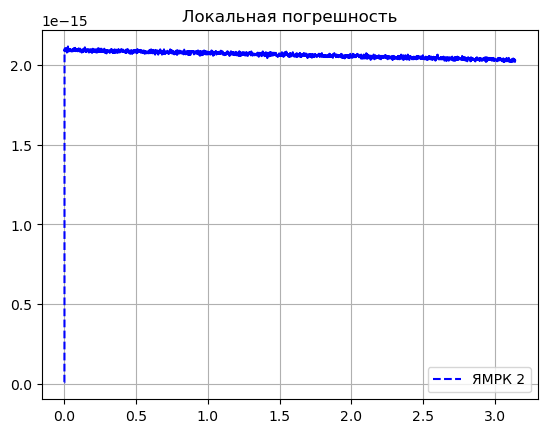

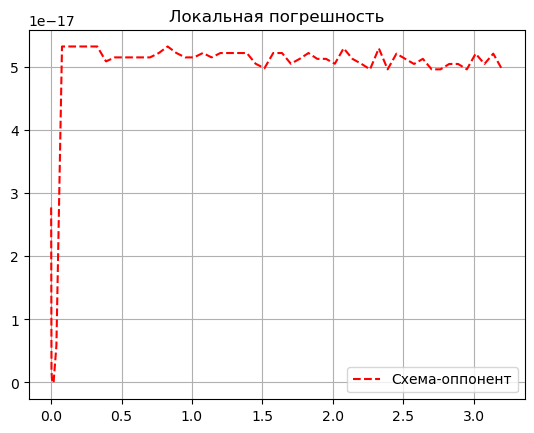

In [145]:
plt.plot(res1['X'], res1['R'], 
        'b--',
        label='ЯМРК 2')

plt.legend(loc='best')
plt.title('Локальная погрешность')
plt.grid()
plt.show()

plt.plot(res2['X'], res2['R'], 
        'r--',
        label='Схема-оппонент')

plt.legend(loc='best')
plt.title('Локальная погрешность')
# plt.ylim((0, 0.3 * 1e-12))
plt.grid()
plt.show()

In [115]:
# print(f'ЯМРК 2: \n{res1["R"]}\n\n ЯМРК 4: \n {res2["R"]}')

### Графики решений для ЯМРК 2


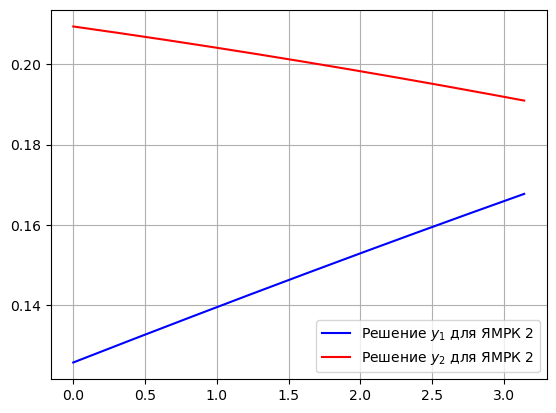

In [116]:
plt.plot(res1['X'], res1['Y1'], 
         'b',
         label='Решение $y_1$ для ЯМРК 2')

plt.plot(res1['X'], res1['Y2'], 
         'r',
         label='Решение $y_2$ для ЯМРК 2')

plt.grid()
plt.legend(loc='best')
plt.show()

### Графики решений для метода-оппонента

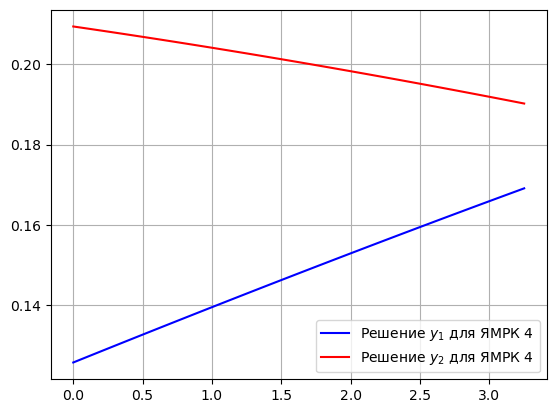

In [117]:
plt.plot(res2['X'], res2['Y1'], 
         'b',
         label='Решение $y_1$ для ЯМРК 4')

plt.plot(res2['X'], res2['Y2'], 
         'r',
         label='Решение $y_2$ для ЯМРК 4')

plt.grid()
plt.legend(loc='best')
plt.show()

### Графики аналитических решений

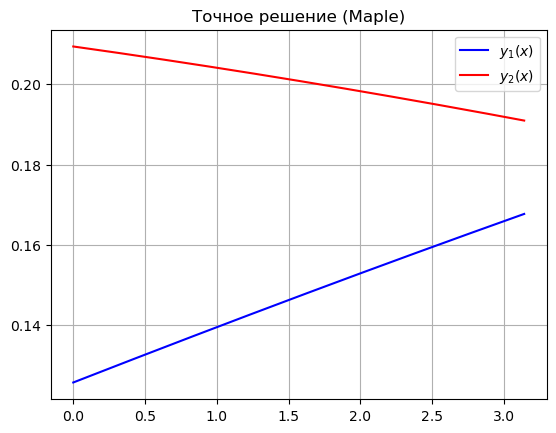

In [118]:
plt.plot(nodes, y1(nodes), color='b', label='$y_1(x)$')
plt.plot(nodes, y2(nodes), color='r', label='$y_2(x)$')

plt.grid()
plt.title('Точное решение (Maple)')
plt.legend()
plt.show()

### График зависимости длины шага от независимой переменной

In [123]:
# print(f'res1["H"]:\n {res1["H"]},\n\n res2["H"]: \n {res1["H"]}')

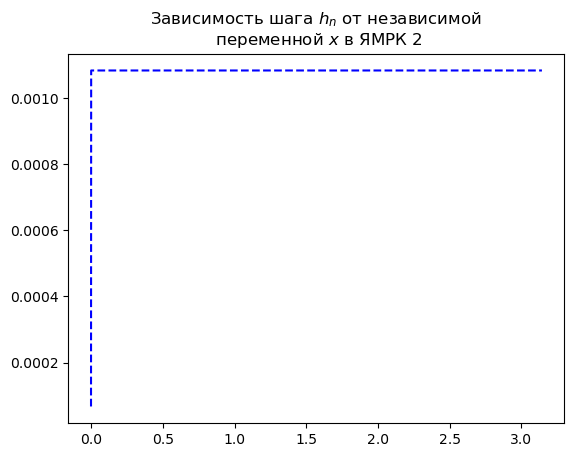

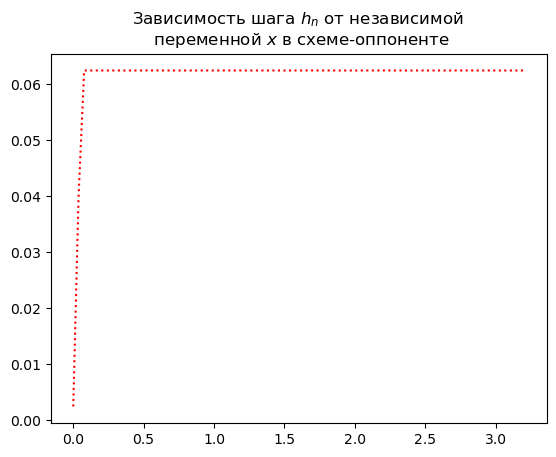

In [146]:
plt.plot(res1['X'], res1['H'], 
         'b', 
         linestyle='--')
plt.title('Зависимость шага $h_n$ от независимой \n переменной $x$ в ЯМРК 2')
plt.show()

plt.plot(res2['X'], res2['H'], 
         'r', 
         linestyle=':')
plt.title('Зависимость шага $h_n$ от независимой \n переменной $x$ в схеме-оппоненте')

plt.show()

### График зависимости нормы полной погрешности от независимой переменной

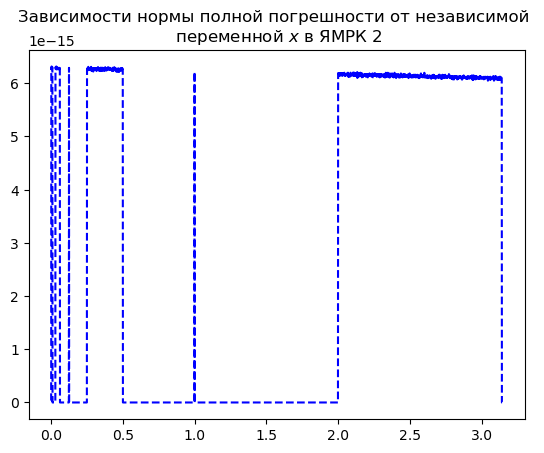

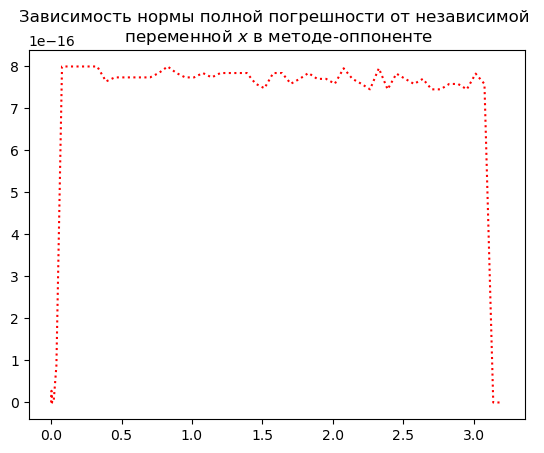

In [147]:
plt.plot(res1['X'], res1['R_ful'], 
        'b', 
        linestyle='--',)
plt.title('Зависимость нормы полной погрешности от независимой \n переменной $x$ в ЯМРК 2')
plt.show()

plt.plot(res2['X'], res2['R_ful'], 
        'r', 
        linestyle=':')
plt.title('Зависимость нормы полной погрешности от независимой \n переменной $x$ в методе-оппоненте')
plt.show()

### Кол-во обращений к правой части в зависимости от rtol

In [132]:
Rtol = [10**(-11), 10**(-12), 10**(-13), 10**(-14)]
COUNT1 = []
COUNT2 = []

for rtol in Rtol:
    print(f'Считаем с rtol = {rtol}...')
    
    res1 = auto_step_rungekutta2(x0, x1, y0, h0, h_max=1/16, rtol=rtol)
    COUNT1.append(res1['count'])
    
    res2 = auto_step_opponent(x0, x1, y0, h0, h_max=1/16, rtol=rtol)
    COUNT2.append(res2['count'])

Считаем с rtol = 1e-11...
Считаем с rtol = 1e-12...


/var/folders/8b/6ssktshx6r1fmq77tl5ypb7c0000gn/T/ipykernel_28222/2198409037.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  h = (x1-x0) / N
/var/folders/8b/6ssktshx6r1fmq77tl5ypb7c0000gn/T/ipykernel_28222/3385958292.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  h = (x1-x0) / N


Считаем с rtol = 1e-13...
Считаем с rtol = 1e-14...


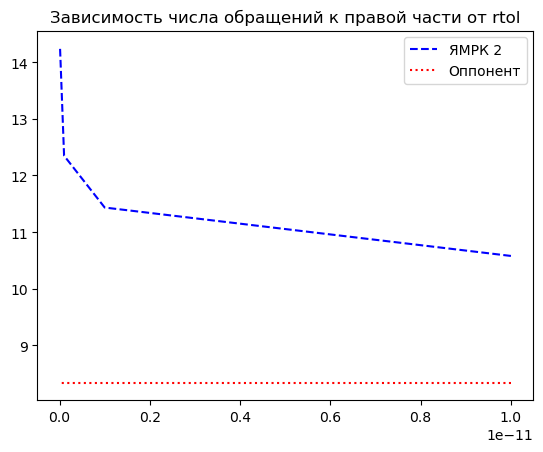

In [148]:
fig, ax = plt.subplots()
COUNT11 = []
COUNT22 = []

for i in range(len(Rtol)):
    COUNT11.append(np.log2(COUNT1[i]))
    COUNT22.append(np.log2(COUNT2[i]))
    
ax.plot(Rtol, COUNT11, 
        'b--', 
        label='ЯМРК 2')

ax.plot(Rtol, COUNT22, 
        'r:', 
        label='Оппонент')

ax.set_title('Зависимость числа обращений к правой части от rtol')
plt.legend()
plt.show()